Initializing SMC sampler...
Sampling 6 chains in 6 jobs


Output()

/home/fabian/anaconda3/envs/pymc_immo_env/lib/python3.12/site-packages/arviz/data/base.py:265: UserWarning: More chains (6) than draws (1). Passed array should have shape (chains, draws, *shape)
  warnings.warn(


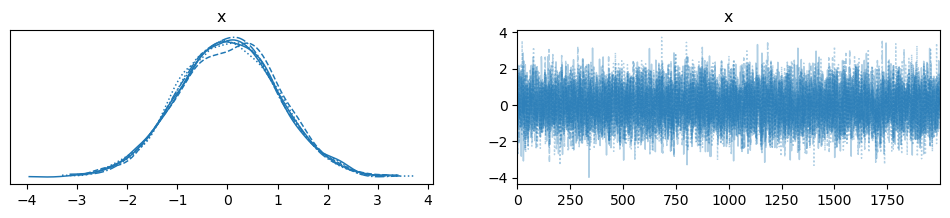

In [10]:
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

with pm.Model() as model:
    x = pm.Normal("x", mu=0, sigma=1)

    # Trick: künstliche, aber symbolisch verbundene "Likelihood"
    pm.Potential("fake_likelihood", 0 * x)

    trace = pm.sample_smc()

az.plot_trace(trace)
plt.show()


Initializing SMC sampler...


Sampling 6 chains in 6 jobs


Output()

/home/fabian/anaconda3/envs/pymc_immo_env/lib/python3.12/site-packages/arviz/data/base.py:265: UserWarning: More chains (6) than draws (3). Passed array should have shape (chains, draws, *shape)
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [x]


Output()

Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 0 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics



🔍 R-hat Werte:
SMC:
<xarray.Dataset> Size: 8B
Dimensions:  ()
Data variables:
    x        float64 8B 1.0
HMC:
<xarray.Dataset> Size: 8B
Dimensions:  ()
Data variables:
    x        float64 8B 1.001


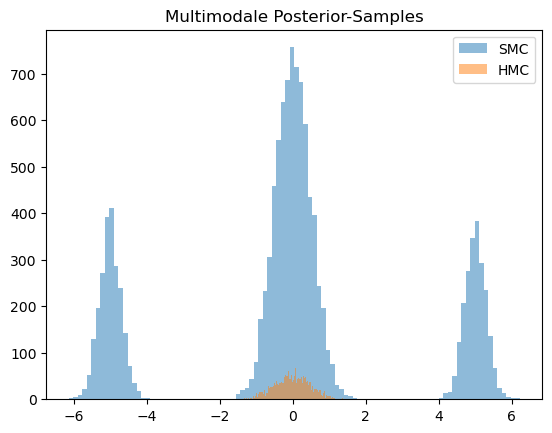

📈 Traceplot SMC:


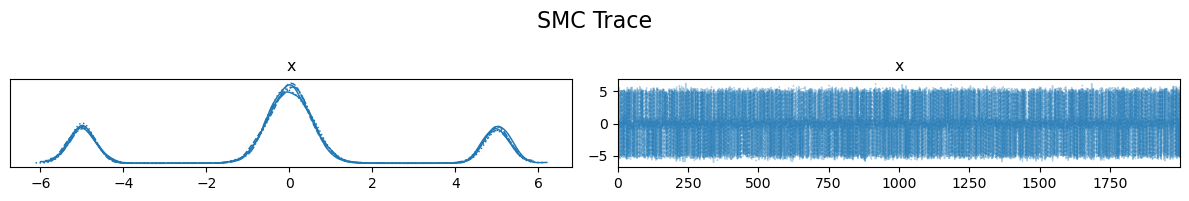

📈 Traceplot HMC:


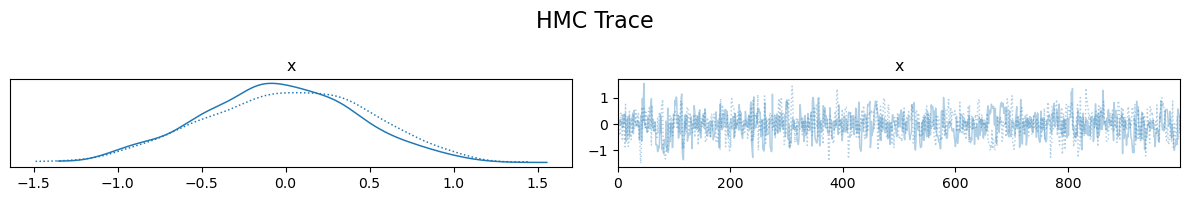

In [14]:
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt
import numpy as np

def log_three_mode(x):
    p1 = pm.logp(pm.Normal.dist(mu=-5, sigma=0.3), x) + pm.math.log(0.2)
    p2 = pm.logp(pm.Normal.dist(mu=0, sigma=0.5), x) + pm.math.log(0.6)
    p3 = pm.logp(pm.Normal.dist(mu=5, sigma=0.3), x) + pm.math.log(0.2)
    return pm.math.logsumexp([p1, p2, p3])

# -----------------------
# SMC
# -----------------------
with pm.Model() as model_smc:
    x = pm.Normal("x", mu=0, sigma=10)
    pm.Potential("multi_potential", log_three_mode(x))
    trace_smc = pm.sample_smc()

# -----------------------
# HMC / NUTS
# -----------------------
with pm.Model() as model_hmc:
    x = pm.Normal("x", mu=0, sigma=10)
    pm.Potential("multi_potential", log_three_mode(x))
    trace_hmc = pm.sample(1000, tune=1000, chains=2, target_accept=0.95, random_seed=42)

# -----------------------
# R-hat und Plot
# -----------------------
rhat_smc = az.rhat(trace_smc)
rhat_hmc = az.rhat(trace_hmc)

print("\n🔍 R-hat Werte:")
print("SMC:")
print(rhat_smc)

print("HMC:")
print(rhat_hmc)

# -----------------------
# Histogram-Vergleich
# -----------------------
plt.hist(trace_smc.posterior['x'].values.flatten(), bins=100, alpha=0.5, label='SMC')
plt.hist(trace_hmc.posterior['x'].values.flatten(), bins=100, alpha=0.5, label='HMC')
plt.legend()
plt.title("Multimodale Posterior-Samples")
plt.show()


# -----------------------
# Traceplots
# -----------------------
print("📈 Traceplot SMC:")
az.plot_trace(trace_smc)
plt.suptitle("SMC Trace", fontsize=16)
plt.tight_layout()
plt.show()

print("📈 Traceplot HMC:")
az.plot_trace(trace_hmc)
plt.suptitle("HMC Trace", fontsize=16)
plt.tight_layout()
plt.show()

